# Neural Network From Scratch

In this notebook I will be creating Neural Network from scratch. All the material and references are from `DeepLearning.Ai` Specialization Course.

First I will import the numpy library

In [1]:
import numpy as np

We will create a one hidden layer network.

It will have `n_x` input, `n_h` nodes in the hidden layer and 1 output .

In [2]:
def initialize_wights(n_x,n_h):
    # Weight of the W1 will be (n_h,n_x)
    # Multiplied with 0.01 to make it near zero and help in training
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.random.randn(n_h,1) * 0.01
    W2 = np.random.randn(1,n_h) * 0.01
    b2 = np.random.randn(1,1) * 0.01

    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }

    return parameters


In [3]:
def sigmoid(x):
    output = 1 / (1 + np.exp(-x))
    return output

In [4]:
def relu(x):
    output = np.maximum(0,x)
    return output

In [5]:
def forward_pass(X , parameters) :
    z1 = np.dot(parameters['W1'],X) + parameters['b1']
    a1 = relu(z1)
    z2 = np.dot(parameters['W2'], a1) + parameters['b2']
    a2 = sigmoid(z2)
    return a2

## Now for L layer Deep Neural Network

In [6]:
def initialize_wights_deep(layer_list):

    # layer_list contains the info of the neural network
    # It can be like [3,4,5,1]
    # This means the input is 3, there are two hidden layers with 4 and 5 nodes respectively and 1 output

    parameters = {}
    no_layers = len(layer_list)

    for l in range(1, no_layers) :
        parameters["W" + str(l)] = np.random.randn(layer_list[l],layer_list[l-1]) * 0.01
        parameters["b" + str(l)] = np.random.randn(layer_list[l],1) * 0.01
        
    return parameters


Now doing forward pass in deep layers

In [7]:
def deep_forward(X,parameters):
    no_weights = len(parameters)//2
    A_temp = X
    for l in range(1,no_weights):
        z = np.dot(parameters["W" + str(l)], A_temp) 
        a = relu(z)
        A_temp = a
    
    Z = np.dot(parameters["W" + str(no_weights)], A_temp)
    A = sigmoid(Z)
    return A

In [8]:
layer_list = [3,4,5,6,7,8,9,1]

parameters = initialize_wights_deep(layer_list)
x  = np.random.randn(3,1)

In [9]:
deep_forward(X= x , parameters= parameters)

array([[0.5]])

## Cost Function

Cost Function is` mean square error`

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- $ n $ is the number of data points,
- $ y_i $ is the actual value of the $i$-th data point,
- $ \hat{y}_i $ is the predicted value of the $i$-th data point.

For a single datapoint (i.e., $ n = 1 $), the formula simplifies to:

$$ \text{MSE} = (y - \hat{y})^2 $$

where:
- $ y $ is the actual value,
- $ \hat{y} $ is the predicted value.

In [10]:
def cost_function(Y, AL) :
    # Y is the target
    # AL is the predicted output
    error = Y - AL
    # we will use mean square error
    cost = (1/2) * (error)**2
    return cost

## Now lets convert all into Class Module

In [183]:
class NeuralNetwork():
    def __init__(self,layer_list = [1,3,1]) -> None:
        self.layer_list = layer_list
        self.parameters = self.initialize_wights_deep(self.layer_list)

    def sigmoid(self,x):
        output = 1 / (1 + np.exp(-x))
        return output  
        
    def relu(self,x):
        output = np.maximum(0,x)
        return output
    
    def initialize_wights_deep(self,layer_list):
        parameters = {}
        no_layers = len(layer_list)

        for l in range(1, no_layers) :
            parameters["W" + str(l)] = np.random.randn(layer_list[l],layer_list[l-1]) * 0.01
            parameters["b" + str(l)] = np.random.randn(layer_list[l],1) * 0.01
            
        return parameters

    def deep_forward(self,X):
        no_weights = len(self.parameters)//2
        A_temp = X
        for l in range(1,no_weights):
            z = np.dot(self.parameters["W" + str(l)], A_temp) 
            a = self.relu(z)
            A_temp = a
        
        Z = np.dot(self.parameters["W" + str(no_weights)], A_temp)
        A = self.sigmoid(Z)
        return A

    def cost_function(self,Y, AL) :
        # Y is the target
        # AL is the predicted output
        error = Y - AL
        # we will use mean square error
        cost = (1/2) * (error)**2
        return cost

In [184]:
model = NeuralNetwork(layer_list= [3,4,5,6,7,8,9,1])
X = np.random.randn(3,1)
AL = model.deep_forward(X= X)
model.cost_function(Y=1 , AL= AL)

array([[0.125]])

## Backpropagation 

The cost function will be the convex function which we have to optimize. We have to choose the parameters value in such a way that the cost function is minimum. For that we use Gradient Descent.

**Derivative of sigmoid function** 

if $\sigma(x)$ is the sigmoid function then its derivative is given as ;

$$
\sigma'(x) = \frac{d}{dx}\sigma(x) =  \sigma(x) (1 - \sigma(x))

$$

**Derivative of Relu function** 

if f(x) is the  function then its derivative is given as ;

$$
f'(x) = f(x)
$$

### Gradient Calculation

Let us consider we have L layers in the network. Now for a $l_{th}$ layer, we have  
$Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$   
And then it is passed to the activation function.  
Let $g(x)$ be the activation function of the $l_{th}$ layer. Then,  
$A^{[l]} = g(Z^{[l]})$  

For the final layer, $A^{[l]}$ will be the predicted output. Then if we have to find the gradients of the weight with respect to the loss function, then we use chain rule to calculate it. For example :

$$
\frac{\partial L_{fn}}{\partial W} = \frac{\partial L_{fn}}{\partial A} *  \frac{\partial A}{\partial Z} * \frac{\partial Z}{\partial W}

$$

Let 
$$

dZ^{[l]} = \frac{\partial L_{fn}}{\partial Z^{[l]}} = \frac{\partial L_{fn}}{\partial A^{[l]}} *  \frac{\partial A^{[l]}}{\partial Z^{[l]}}
$$

Also,

$A^{[l]} = g(Z^{[l]})$  

`NOTATION USED FOR CODING :`   
 $\frac{\partial L_{fn}}{\partial X} = dX$


Thus,

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$    
Where `g()` is the activation function  

Also 

$Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$   

So,
$$
\frac{\partial Z^{[l]}}{\partial W^{[l]}} = A^{[l-1]} \\
\frac{\partial Z^{[l]}}{\partial b^{[l]}} = 1
$$

Now if we have  $dZ^{[l]}$ , we can calulate others as :

$$ dW^{[l]} = \frac{\partial L_{fn} }{\partial W^{[l]}} =  dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial L_{fn} }{\partial b^{[l]}} =   dZ^{[l]}$$
$$ dA^{[l-1]} = \frac{\partial L_{fn} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$


So, when doing a `forward pass`, we have to store the output of each layers (`cache`) as, it will be used in calculating `gradients`.

In [185]:
def deep_forward(self,X):
    self.cache = []
    no_weights = len(self.parameters)//2
    A_temp = X
    for l in range(1,no_weights):
        z = np.dot(self.parameters["W" + str(l)], A_temp) + self.parameters["b" + str(l)]
        a = self.relu(z)
        temp_cache =(z,self.parameters["W" + str(l)],self.parameters["b" + str(l)],A_temp)
        self.cache.append(temp_cache)
        A_temp = a 
        
    Z = np.dot(self.parameters["W" + str(no_weights)], A_temp) + self.parameters["b" + str(no_weights)]
    A = self.sigmoid(Z)
    temp_cache = (Z,self.parameters["W" + str(no_weights)],self.parameters["b" + str(no_weights)],A_temp)
    self.cache.append(temp_cache)
    return A

Cache order = (`Activation Output(A)`, `Net Output(Z)`, `W`, `b`, $A^{[l-1]}$)

Lets create backward pass function

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$   

If, the Cost or loss function used is Mean Squared Error.

For a non vector implementation, i.e for a single input data passed at a time, there will be a target($Y$) and a predicted output($AL$).

Then,

dAL = Loss(Error) = $ Y - AL  $  
Now,

$ \text{Cost Function} (L_{fn}) = \frac{1}{2} * {(Y - AL)}^2 =  \frac{1}{2} * {Loss}^2 $

So,

$$
dAL = \frac{\partial L_{fn}}{\partial AL} = \frac{1}{2} * 2 * (Y - AL) * (-1) \\
dAL = - (Y - AL)
$$



$$ dW^{[l]} = \frac{\partial L_{fn} }{\partial W^{[l]}} =  dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial L_{fn} }{\partial b^{[l]}} =   dZ^{[l]}$$
$$ dA_{prev} = dA^{[l-1]} = \frac{\partial L_{fn} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

### Code implementation

In [60]:
def sigmoid_derivative(Z):
    s = sigmoid(Z)
    return s * (1 - s)

In [61]:
def relu_derivative(Z):
    return np.where(Z > 0, 1, 0)

In [186]:
def backward_pass(Y_target, AL, cache):
    grads = {}
    no_layers = len(cache)
    Y_target = Y_target.reshape(AL.shape)
    dAL = -(Y_target - AL)
    
    # The final output activation used is sigmoid
    Z_cache,W_cache,b_cache, A_prev_cache = cache[-1]
    dZ = dAL * sigmoid_derivative(Z_cache)
    dW_temp = np.dot(dZ, A_prev_cache.T)
    db_temp = dZ
    dA_prev_temp = np.dot(W_cache.T, dZ)
    
    grads["dA" + str(no_layers - 1)] = dA_prev_temp
    grads["dW" + str(no_layers)] = dW_temp
    grads["db" + str(no_layers)] = db_temp

    for l in reversed(range(no_layers - 1)):
        Z_cache,W_cache,b_cache, A_prev_cache = cache[l]
        # Relu activation has been used 
        dZ = np.array(dA_prev_temp,copy= True)
        dZ[Z_cache <= 0] = 0 
        dW_temp = np.dot(dZ, A_prev_cache.T)
        db_temp = dZ
        dA_prev_temp = np.dot(W_cache.T, dZ)
        
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
            
    return grads

Lets Check Whether our backward pass works or not.Let `Y_target` be 1

In [84]:
Y_target = 1
backward_grad = backward_pass(
    Y_target= np.array([Y_target], dtype = np.float64 ) ,
    AL = output, cache = model.cache )

In [85]:
for key in backward_grad.keys():
    print(f"{key} : {backward_grad[key].shape}")

dA1 : (4, 1)
dW2 : (1, 4)
db2 : (1, 1)
dA0 : (3, 1)
dW1 : (4, 3)
db1 : (4, 1)


In [86]:
layer_no = 1
for c in model.cache :
    Z_cache,W_cache,b_cache, A_prev_cache = c
    print(f" W_cache{str(layer_no)} : {W_cache.shape}")
    print(f" b_cache{str(layer_no)} : {b_cache.shape}")
    print(f" A_prev_cache{str(layer_no)} : {A_prev_cache.shape}")
    layer_no += 1 

 W_cache1 : (4, 3)
 b_cache1 : (4, 1)
 A_prev_cache1 : (3, 1)
 W_cache2 : (1, 4)
 b_cache2 : (1, 1)
 A_prev_cache2 : (4, 1)


Thus our shape and size matches

## Parameter Update

Now updating parameters using the formula :
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

Where $\alpha$ is the learning rate

### Code Implementation

In [87]:
def update_parameters(params, grads, learning_rate):

    parameters = params
    L = len(parameters) // 2  
    for l in range(L):  
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)] 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)] 
    return parameters

In [88]:
parameters = model.parameters
parameters_updated = update_parameters(params= parameters , grads= backward_grad , learning_rate= 0.01)

In [89]:
parameters_updated

{'W1': array([[ 0.00375298,  0.01316039,  0.00355996],
        [ 0.00446401,  0.03684394, -0.00615335],
        [ 0.00850821,  0.01395093,  0.01171703],
        [-0.01454772, -0.00176866,  0.00351362]]),
 'b1': array([[ 0.00147138],
        [-0.00585842],
        [-0.0172551 ],
        [-0.00457214]]),
 'W2': array([[-0.01229051, -0.00092437, -0.02255535,  0.01892372]]),
 'b2': array([[-0.0046815]])}

# Class Implementation

In [180]:
class NeuralNetwork():
    def __init__(self,layer_list = [1,3,1]) -> None:
        self.layer_list = layer_list
        self.parameters = self.initialize_weights_deep(self.layer_list)
        self.cache = []
        self.epoch_loss = []

    def sigmoid(self,x):
        output = 1 / (1 + np.exp(-x))
        return output
        
    def relu(self,x):
        output = np.maximum(0,x)
        return output
    
    def initialize_weights_deep(self,layer_list):
        parameters = {}
        no_layers = len(layer_list)

        for l in range(1, no_layers) :
            parameters["W" + str(l)] = np.random.randn(layer_list[l],layer_list[l-1]) * 0.1
            parameters["b" + str(l)] = np.random.randn(layer_list[l],1) * 0.1
            
        return parameters

    def deep_forward(self,X):
        self.cache = []
        no_weights = len(self.parameters)//2
        A_temp = X
        for l in range(1,no_weights):
            z = np.dot(self.parameters["W" + str(l)], A_temp) + self.parameters["b" + str(l)]
            a = self.relu(z)
            temp_cache =(z,self.parameters["W" + str(l)],self.parameters["b" + str(l)],A_temp)
            self.cache.append(temp_cache)
            A_temp = a 
            
        Z = np.dot(self.parameters["W" + str(no_weights)], A_temp) + self.parameters["b" + str(no_weights)]
        A = self.sigmoid(Z)
        temp_cache = (Z,self.parameters["W" + str(no_weights)],self.parameters["b" + str(no_weights)],A_temp)
        self.cache.append(temp_cache)
        return A
    
    def backward_pass(self,Y_target, AL):
        grads = {}
        no_layers = len(self.cache)
        Y_target = Y_target.reshape(AL.shape)
        dAL = -(Y_target - AL)
        
        # The final output activation used is sigmoid
        Z_cache,W_cache,b_cache, A_prev_cache = self.cache[-1]
        dZ = dAL * self.sigmoid_derivative(Z_cache)
        dW_temp = np.dot(dZ, A_prev_cache.T)
        db_temp = dZ
        dA_prev_temp = np.dot(W_cache.T, dZ)
        
        grads["dA" + str(no_layers - 1)] = dA_prev_temp
        grads["dW" + str(no_layers)] = dW_temp
        grads["db" + str(no_layers)] = db_temp

        for l in reversed(range(no_layers - 1)):
            Z_cache,W_cache,b_cache, A_prev_cache = self.cache[l]
            # Relu activation has been used 
            dZ = np.array(dA_prev_temp,copy= True)
            dZ[Z_cache <= 0] = 0 
            dW_temp = np.dot(dZ, A_prev_cache.T)
            db_temp = dZ
            dA_prev_temp = np.dot(W_cache.T, dZ)
            
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp
            grads["db" + str(l + 1)] = db_temp
                
        return grads

    def update_parameters(self, grads, learning_rate):
        L = len(self.parameters) // 2  
        for l in range(L):  
            self.parameters["W" + str(l+1)] = self.parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)] 
            self.parameters["b" + str(l+1)] = self.parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)] 


    def train(self, X,y, learning_rate, epochs = 10 , verbose_epoch = 10, verbose = True) :
        self.epoch_loss = []
        dataset_length = len(X)
        for epoch in range(epochs) :
            cost = 0 
            for iter in range(0,dataset_length) :
                out = self.deep_forward(X[iter])
                cost += self.cost_function(Y= y[iter] , AL = out)
                grad = self.backward_pass(Y_target= y[iter] , AL = out)
                self.update_parameters(grads = grad, learning_rate= learning_rate)
            cost = cost/dataset_length
            if epoch % verbose_epoch == 0 and verbose:
                print(f"Epoch {epoch} Loss : {cost[0][0]}")
            self.epoch_loss.append(cost[0][0])
        
    def cost_function(self,Y, AL) :
        # Y is the target
        # AL is the predicted output
        error = Y - AL
        # we will use mean square error
        cost = (1/2) * (error)**2
        return cost
    
    def sigmoid_derivative(self,Z):
        s = self.sigmoid(Z)
        return s * (1 - s)
        
    def plot_epoch(self):
        plt.figure(figsize=(5,3))
        plt.plot(self.epoch_loss, linestyle='-', color='b', label='Epoch Loss')
        plt.title('Epoch Loss Over Time')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def clear_weights(self):
        self.parameters = self.initialize_weights_deep(self.layer_list)
    

Lets create a random dataset to train the model we just created.

In [165]:
num_samples = 500
X = np.linspace(-2 * np.pi, 2 * np.pi, num_samples).reshape(num_samples,1,1)
y = 0.5 * (np.sin(X) + 1)

# Normalize input data
X_norm = (X - X.mean()) / X.std()

Since we have used `sigmoid` function in the last layer activation function, Our output will be in the range 0 to 1 . So we shifted our output sinx.

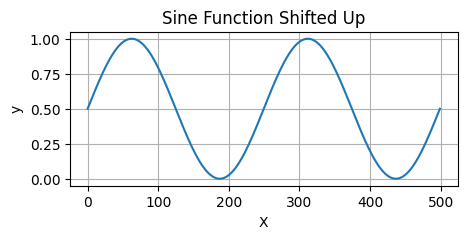

In [166]:
# Plotting
plt.figure(figsize=(5, 2))
plt.plot(y[: , 0])
plt.title('Sine Function Shifted Up')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Training

Our input has 500 sample data. lets create a neural network with `2` hidden layers with `10` node in first and second hidden layer.

Thus our neural network architecture is as :



In [173]:
# Initialize and train the neural network
layers_architecture = [1,10,10,1]
nn = NeuralNetwork(layer_list= layers_architecture)

Epoch 0 Loss : 0.06244991205951288
Epoch 200 Loss : 0.006165241866946359
Epoch 400 Loss : 0.003518060336533567
Epoch 600 Loss : 0.0008731145749017363
Epoch 800 Loss : 0.00029580651557426115


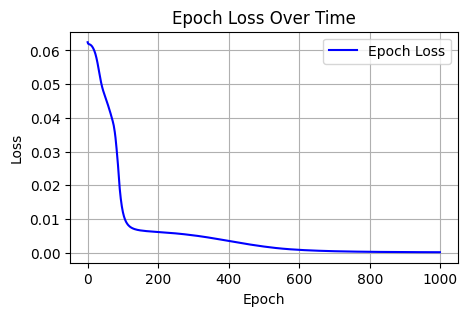

In [174]:
nn.train(X_norm, y, learning_rate=0.01, epochs = 1000 , verbose_epoch = 200 ) 
nn.plot_epoch() 

## Lets see the actual and predicted plot

In [176]:
y_pred = np.array([nn.deep_forward(x.reshape(-1, 1))[0][0] for x in X_norm])

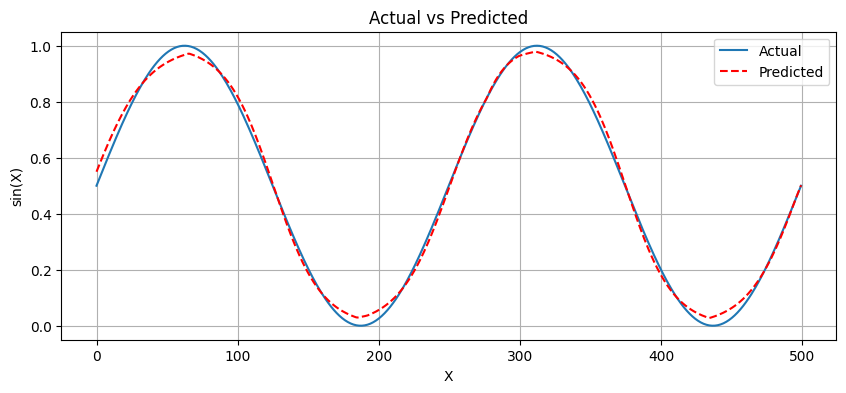

In [177]:
# Plot predictions
plt.figure(figsize=(10, 4))
plt.plot( y[:,0], label='Actual')
plt.plot( y_pred, label='Predicted', linestyle='dashed' , color ='r')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('sin(X)')
plt.legend()
plt.grid(True)
plt.show()

## Results at different epochs
 
Lets See how our neural network outputs look at different epochs

In [181]:
import numpy as np
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(nn, X_norm, y, learning_rate=0.01):
    epochs_list = [10, 50, 100, 500, 1000]
    
    plt.figure(figsize=(15, 8))
    
    for i, epochs in enumerate(epochs_list):
        # Train the model
        nn.train(X_norm, y, learning_rate=learning_rate, epochs=epochs, verbose = False)
        
        # Generate predictions
        y_pred = np.array([nn.deep_forward(x.reshape(-1, 1))[0][0] for x in X_norm])
        
        # Plot predictions
        plt.subplot(2, 3, i + 1)
        plt.plot(y[:, 0], label='Actual')
        plt.plot(y_pred, label='Predicted', linestyle='dashed', color='r')
        plt.title(f'Actual vs Predicted for {epochs} epochs')
        plt.xlabel('X')
        plt.ylabel('sin(X)')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

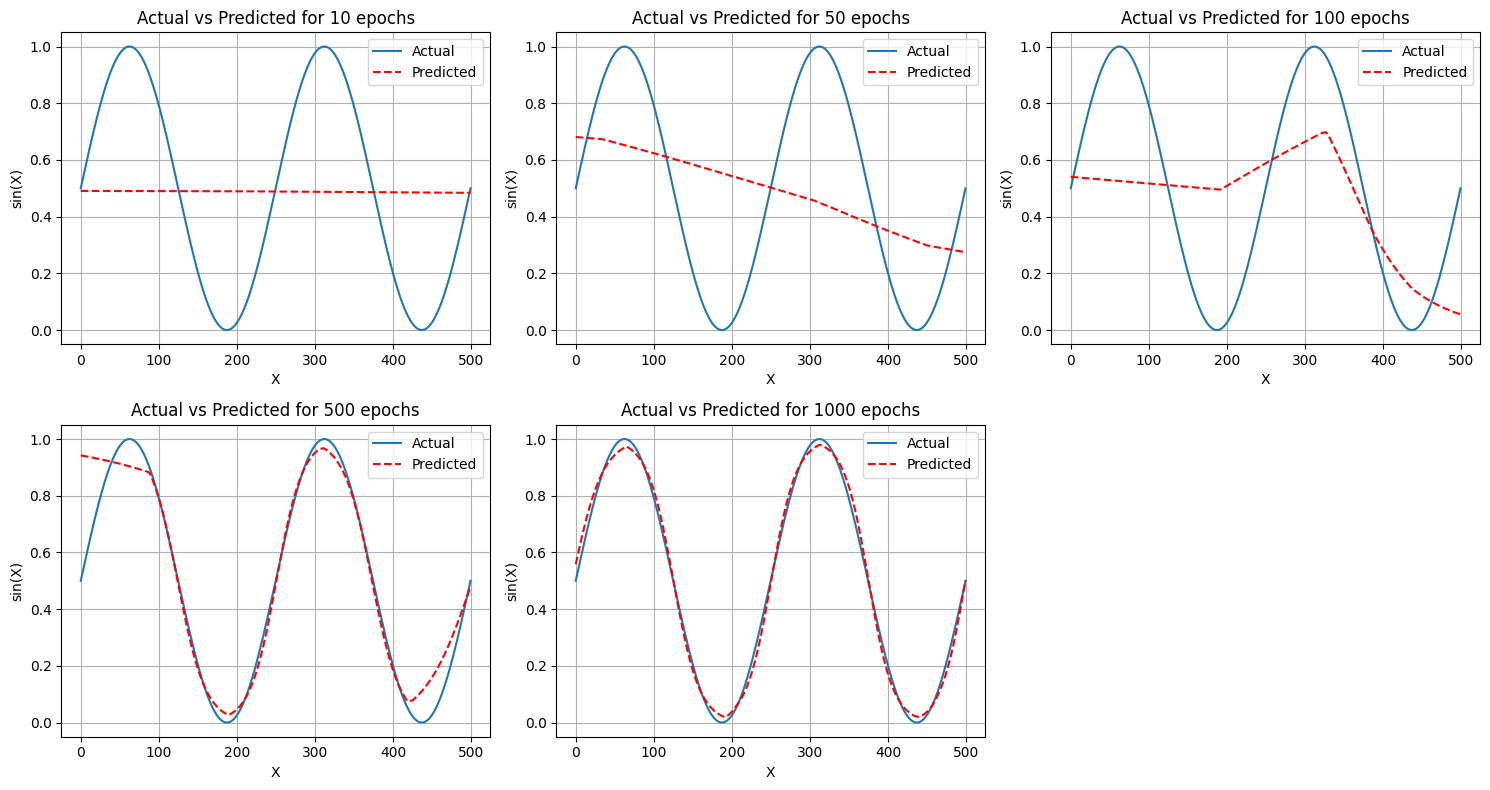

In [182]:
layers_architecture = [1,10,10,1]
nn = NeuralNetwork(layer_list= layers_architecture)
plot_actual_vs_predicted(nn, X_norm, y)

## Bash Script Code

```bash
python train.py --layers 1 10 10 1 --learning_rate 0.01 --epochs 1000 --verbose_epoch 200

```